In [1]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

%matplotlib inline

In [2]:
datafile1 = xr.open_dataset("~/shared-tacco-ns1004k-cmip-betzy/NCAR/CESM2/historical/r1i1p1f1/Amon/tas/gn/latest/tas_Amon_CESM2_historical_r1i1p1f1_gn_185001-201412.nc")
datafile1

/opt/conda/lib/python3.11/site-packages/xarray/conventions.py:432: SerializationWarning: variable 'tas' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


<xarray.Dataset>
Dimensions:    (time: 1980, lat: 192, lon: 288, nbnd: 2)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time       (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00
Dimensions without coordinates: nbnd
Data variables:
    tas        (time, lat, lon) float32 ...
    time_bnds  (time, nbnd) object ...
    lat_bnds   (lat, nbnd) float32 ...
    lon_bnds   (lon, nbnd) float32 ...
Attributes: (12/45)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    case_id:                15
    cesm_casename:          b.e21.BHIST.f09_g17.CMIP6-historical.001
    contact:                cesm_cmip6@ucar.edu
    creation_date:          2019-01-16T23:34:05Z
    ...                     ...
    sub_experiment:         none
    sub_experiment_id:      none
    branch_time_in_parent:  219000.0
    branch_time_in_child:   674885.0
    branch_method:          standard
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.NCAR.CESM2.h...

In [3]:
datafile2 = xr.open_dataset("~/shared-tacco-ns1004k-cmip-betzy/NCAR/CESM2/historical/r1i1p1f1/Amon/ts/gn/latest/ts_Amon_CESM2_historical_r1i1p1f1_gn_185001-201412.nc")
datafile2

/opt/conda/lib/python3.11/site-packages/xarray/conventions.py:432: SerializationWarning: variable 'ts' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


<xarray.Dataset>
Dimensions:    (time: 1980, lat: 192, lon: 288, nbnd: 2)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time       (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00
Dimensions without coordinates: nbnd
Data variables:
    ts         (time, lat, lon) float32 ...
    time_bnds  (time, nbnd) object ...
    lat_bnds   (lat, nbnd) float32 ...
    lon_bnds   (lon, nbnd) float32 ...
Attributes: (12/45)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    case_id:                15
    cesm_casename:          b.e21.BHIST.f09_g17.CMIP6-historical.001
    contact:                cesm_cmip6@ucar.edu
    creation_date:          2019-01-16T21:40:35Z
    ...                     ...
    sub_experiment:         none
    sub_experiment_id:      none
    branch_time_in_parent:  219000.0
    branch_time_in_child:   674885.0
    branch_method:          standard
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.NCAR.CESM2.h...

In [4]:
tas = datafile1['tas'].sel(time=slice('1961','1990'))
ts = datafile2['ts'].sel(time=slice('1961','1990'))

In [5]:
tas

<xarray.DataArray 'tas' (time: 360, lat: 192, lon: 288)>
[19906560 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time     (time) object 1961-01-15 12:00:00 ... 1990-12-15 12:00:00
Attributes: (12/19)
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    comment:        near-surface (usually, 2 meter) air temperature
    description:    near-surface (usually, 2 meter) air temperature
    frequency:      mon
    id:             tas
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Near-Surface Air Temperature
    type:           real
    units:          K
    variable_id:    tas

## Calculate tas weighted mean

In [6]:
weights_near_surface_temp = np.cos(np.deg2rad(tas.lat))
near_surface_temp_weighted = tas.weighted(weights_near_surface_temp) 
near_surface_temp_weighted_mean = tas.mean(("lon", "lat"))

## Calculate ts weighted mean

In [7]:
weights_surface_temp = np.cos(np.deg2rad(ts.lat))
surface_temp_weighted = ts.weighted(weights_surface_temp) 
surface_temp_weighted_mean = ts.mean(("lon", "lat"))

#### Calculate spatial mean

In [8]:
near_surface_temp_weighted_factor = tas.mean(("lon", "lat")).mean()
surface_temp_weighted_factor = ts.mean(("lon", "lat")).mean()

## Plot timeseries of tas and ts and difference between them

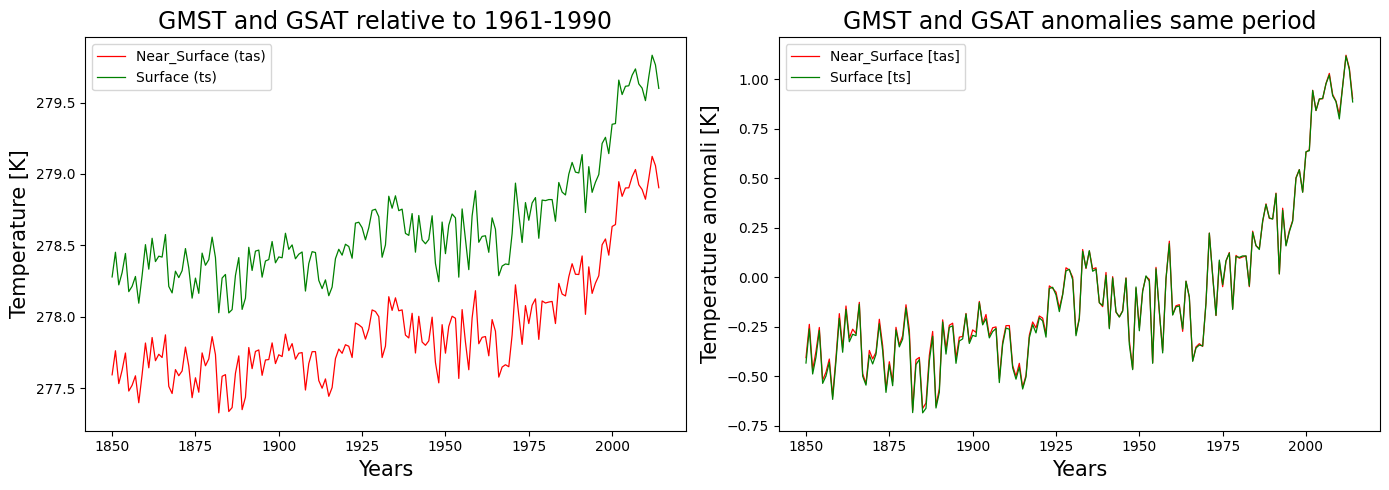

In [9]:
fig, (axs) = plt.subplots(nrows=1, ncols=2, figsize=(14,5))
near_surface_temp_weighted_mean = datafile1['tas'].groupby('time.year').mean(("lon", "lat", 'time')).plot(ax=axs[0], linewidth = 0.9, color='red', label='Near_Surface (tas)')
surface_temp_weighted_mean = datafile2['ts'].groupby('time.year').mean(("lon", "lat", 'time')).plot(ax = axs[0], linewidth = 0.9, color='green' , label='Surface (ts)')

near_surface_temp_weighted_mean_anomali = (datafile1['tas']-near_surface_temp_weighted_factor).groupby('time.year').mean(("lon", "lat", 'time')).plot(ax=axs[1], linewidth = 0.9, color='red',  label='Near_Surface [tas]')
surface_temp_weighted_mean_anomali = (datafile2['ts']-surface_temp_weighted_factor).groupby('time.year').mean(("lon", "lat", 'time')).plot(ax = axs[1], linewidth = 0.9, color='green', label='Surface [ts]')
axs[0].set_ylabel('Temperature [K]', fontsize=15)
axs[0].set_xlabel('Years', fontsize=15)
axs[1].set_xlabel('Years', fontsize=15)
axs[1].set_ylabel('Temperature anomali [K]', fontsize=15)
axs[0].set_title('GMST and GSAT relative to 1961-1990', fontsize=17)
axs[1].set_title('GMST and GSAT anomalies same period', fontsize=17)
axs[0].legend()
axs[1].legend()
plt.tight_layout()
plt.savefig('GMST_GSAT_rel_1961_1990.png')


## show a spatial pattern of the difference between tas and ts

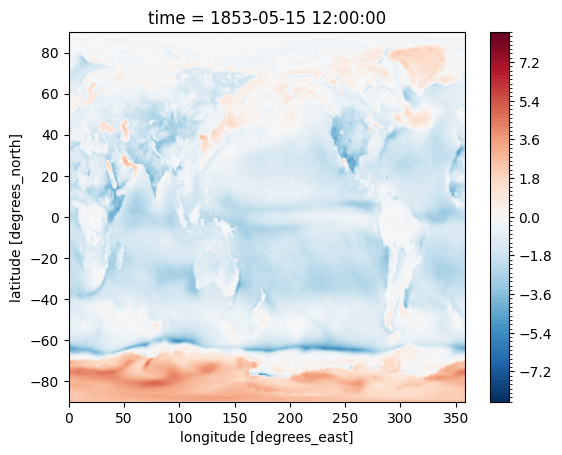

In [11]:
diff = (datafile1['tas'] - datafile2['ts']).isel(time=40)
diff.plot.contourf(levels=100)